#  TP3_Clustering_et_Word2Vec

### Lamblin Ngueyap 

## Imports

In [1]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

In [2]:
import nltk

nltk.download('punkt')
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to /Users/elfabnyl/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/elfabnyl/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
data_path = "../data/txt/"

## Choisir une décennie

In [4]:
DECADE = '1890'

## Charger tous les  fichiers de la décennie et en créer une liste de textes

In [5]:
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]

In [6]:
# Exemple de fichiers
files[:5]

['KB_JB838_1890-01-05_01-00004.txt',
 'KB_JB838_1890-01-06_01-00003.txt',
 'KB_JB838_1890-01-08_01-00003.txt',
 'KB_JB838_1890-01-09_01-00003.txt',
 'KB_JB838_1890-01-12_01-00004.txt']

In [7]:
texts = [open(data_path + f, "r", encoding="utf-8").read() for f in files]

In [8]:
# Exemple de textes
texts[0][:400]

"Commencera demain lundi le 6 janvier Notre vente n’ù, lieu qu'une fois'par'ail, n 9 driétr de commun ètïï§ : ] être confondüè avec ùucune autre mise en vente. 1 Ce n’est pas une vente de soldes ou de marchandises déclassées,. priais bien une tiqüidaUqm ' Irûle de tous nos articles. ' ; iPendant la durée de la vente -toutes nos marchandnëê/sUm aucune* exception : SOfEMîmJi' VELOURS, LAINAGES, DRAPE"

## Vectoriser les documents à l'aide de TF-IDF

In [9]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

### Instancier le modèle TF-IDF avec ses arguments

In [10]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

### Construire la matrice de vecteurs à l'aide de la fonction `fit_transform`

In [11]:
tfidf_vectors = vectorizer.fit_transform(texts)

/Users/elfabnyl/Documents/STIC/tac_venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [12]:
# Détail de la matrice
tfidf_vectors

<900x3199 sparse matrix of type '<class 'numpy.float64'>'
	with 581940 stored elements in Compressed Sparse Row format>

### Imprimer le vecteur tf-IDF du premier document

In [13]:
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)

janvier      0.339744
contenant    0.321861
notaire      0.298355
1890         0.237358
are          0.229971
               ...   
.l           0.000000
.s           0.000000
.v           0.000000
.à           0.000000
-■           0.000000
Length: 3199, dtype: float64

## Comprendre les vecteurs et leurs "distances"

In [14]:
cosine([1, 2, 3], [1, 2, 3])

np.float64(0.0)

In [15]:
cosine([1, 2, 3], [1, 2, 2])

np.float64(0.02004211298777725)

In [16]:
cosine([1, 2, 3], [2, 2, 2])

np.float64(0.07417990022744858)

### Tests sur nos documents

In [17]:
tfidf_array = tfidf_vectors.toarray()

In [18]:
# Vecteur du document 0
tfidf_array[0]

array([0.        , 0.        , 0.03966757, ..., 0.        , 0.        ,
       0.        ])

In [19]:
# Vecteur du document 1
tfidf_array[1]

array([0.        , 0.        , 0.02106441, ..., 0.        , 0.        ,
       0.        ])

In [20]:
cosine(tfidf_array[0], tfidf_array[1])

np.float64(0.6463920765266045)

## Appliquer un algorithme de clustering sur les vecteurs TF-IDF des documents

Pour en savoir plus sur le KMeans clustering :
- https://medium.com/dataseries/k-means-clustering-explained-visually-in-5-minutes-b900cc69d175

### Définir un nombre de clusters

In [21]:
N_CLUSTERS = 7

### Instancier le modèle K-Means et ses arguments

In [22]:
km_model = KMeans(n_clusters=N_CLUSTERS)

### Appliquer le clustering à l'aide de la fonction `fit_predict`

In [23]:
clusters = km_model.fit_predict(tfidf_vectors)

In [24]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [25]:
pprint(dict(clustering))

{np.int32(0): ['KB_JB838_1890-01-06_01-00003.txt',
               'KB_JB838_1890-01-08_01-00003.txt',
               'KB_JB838_1890-01-09_01-00003.txt',
               'KB_JB838_1890-01-24_01-00003.txt',
               'KB_JB838_1890-03-09_01-00007.txt',
               'KB_JB838_1890-04-05_01-00003.txt',
               'KB_JB838_1890-04-15_01-00003.txt',
               'KB_JB838_1890-05-08_01-00003.txt',
               'KB_JB838_1890-05-10_01-00003.txt',
               'KB_JB838_1890-07-09_01-00003.txt',
               'KB_JB838_1890-08-16_01-00003.txt',
               'KB_JB838_1890-11-07_01-00003.txt',
               'KB_JB838_1890-11-14_01-00003.txt',
               'KB_JB838_1890-12-06_01-00003.txt',
               'KB_JB838_1890-12-15_01-00003.txt',
               'KB_JB838_1891-02-06_01-00003.txt',
               'KB_JB838_1891-02-20_01-00003.txt',
               'KB_JB838_1891-04-08_01-00003.txt',
               'KB_JB838_1891-05-02_01-00003.txt',
               'KB_JB838_1891-0

## Visualiser les clusters

### Réduire les vecteurs à 2 dimensions à l'aide de l'algorithme PCA
Cette étape est nécessaire afin de visualiser les documents dans un espace 2D

https://fr.wikipedia.org/wiki/Analyse_en_composantes_principales

In [26]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

In [27]:
reduced_vectors[:10]

array([[-0.07376404,  0.58397259],
       [ 0.1210826 ,  0.44897298],
       [-0.09564643,  0.19921268],
       [-0.09967026,  0.19345315],
       [-0.07116783,  0.57678448],
       [-0.21578394, -0.1158428 ],
       [-0.2350747 , -0.06550891],
       [-0.1814789 , -0.08390877],
       [-0.10335835,  0.17824325],
       [-0.25679124, -0.18774941]])

### Générer le plot

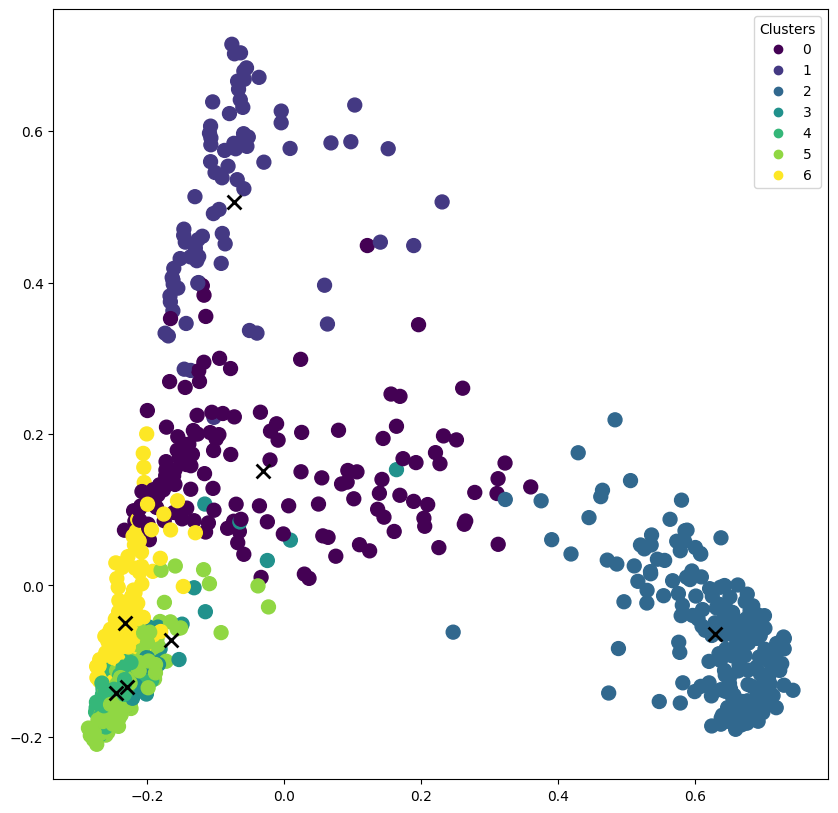

In [28]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")

### 3. Interprétation des résultats

### 4. Téléchargement et préparation du fichier sents.txt
Le fichier sents.txt a été téléchargé et placé dans le dossier data/. Ce fichier contient des phrases segmentées, prêtes pour l'entraînement du modèle Word2Vec.

### 5. Entraîner un modèle Word2Vec


In [ ]:
from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import wordpunct_tokenize
from unidecode import unidecode

nltk.download('punkt')

# Charger et traiter les phrases du corpus
class MySentences(object):
    def __init__(self, filename):
        self.filename = filename

    def __iter__(self):
        for line in open(self.filename, encoding='utf-8'):
            yield [unidecode(w.lower()) for w in wordpunct_tokenize(line)]

infile = "../data/sents1.txt"
sentences = MySentences(infile)

# Détection des bigrams et trigrams
bigram_phrases = Phrases(sentences)
bigram_phraser = Phraser(bigram_phrases)
trigram_phrases = Phrases(bigram_phraser[sentences])
trigram_phraser = Phraser(trigram_phrases)
corpus = list(trigram_phraser[bigram_phraser[sentences]])

# Entraîner le modèle Word2Vec
model = Word2Vec(corpus, vector_size=32, window=1, min_count=1, workers=4, epochs=5)
model.save("../data/word2vec.model")


### 6. Comparaison des modèles
